In [15]:
# Problems in Microeconomics 
# Let's solve a few basic problems related to utility maximization concept
from scipy.optimize import minimize #since we cannot have the option'maximize', we have to minimize and define the function accordingly
import numpy as np
def U(x):
    return -1.0*(x[0]**0.5)*(x[1]**0.5) #Cobb Douglas Utility Function
p1 = 2.0 # assuming price of good 1 to be equal to 2
p2 = 5.0 # assuming price of good 2 to be equal to 5
m = 1000.0 # assuming income to be equal to 1000
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([p1,p2],0,m)  
from scipy.optimize import Bounds 
bounds = Bounds([0,0],[m,m]) # One cannot consume more than m units of either consumer good and also not negative amounts
x0 = np.array([2,3])
result = minimize(U,x0,method = 'trust-constr', constraints = [linear_constraint], bounds = bounds)
print(result.x)

[249.99968679  99.99992298]


In [2]:
# Let us solve a problem where consumer goods are perfect substitutes
from scipy.optimize import linprog # We use linear programming here, since the utility function is a linear transformation
import numpy as np
a = 1.0
b = 1.0
p1 = 2.0 # Price of x (denoted by p1) is 2 
p2 = 5.0 # Price of y (denoted by p2) is 5
m = 10.0 # Income of consumer is 10 
c = np.array([[-a,-b]]) # Essentially we take a=b=1 in this problem  where U(x,y) = ax + by, c contains the coefficients
A_ub = np.array([[p1,p2]]) 
b_ub = np.array([m])
result = linprog(c,A_ub = A_ub, b_ub = b_ub)
print(result)
# As we can see, the consumer will buy 5 units of x and 0 units of y (the value displayed for y is approximately equal to 0) 

     con: array([], dtype=float64)
     fun: -4.999999999381963
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([8.27814262e-10])
  status: 0
 success: True
       x: array([5.00000000e+00, 1.36087209e-10])


In [18]:
# Intertemporal Optimization Problem (2 period model) 
# Consumption in second period is discounted by a discount factor and savings of first period is used in second period
import numpy as np 
from scipy.optimize import minimize 
a = 0.25 # discount factor
def U(x):
    return -1.0*(np.log(x[0]) + np.log(x[1])/(1 + a))
r = 0.5 # rate of interest 
m1 = 100 # income in period 1
m2 = 100 # income in period 2
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([1,1/(1+r)],0,m1 + m2/(1+r))
from scipy.optimize import Bounds
bounds = Bounds([0,0],[m1,m1 + m2])
x0 = np.array([10,10])
result = minimize(U,x0,method = 'trust-constr', constraints = [linear_constraint],bounds = bounds) 
print(result.x)

[ 92.58934556 111.11509329]


In [1]:
# Let us try a single variable optimization process 
from sympy import *
x = symbols("x", real = True)
f = x**2 - 3*x + 2
from sympy import diff 
h = diff(f,x)
from sympy import solveset 
z = solveset(Eq(h,0),x)  
z
#This process gives us stationary points only

FiniteSet(3/2)

In [8]:
# Let us try another method for univariate optimization
from scipy.optimize import minimize_scalar
def f(x):
    return x**2 - 3*x + 2
result = minimize_scalar(f, method = 'brent')
print(result)

     fun: -0.24999999999999956
    nfev: 9
     nit: 5
 success: True
       x: 1.4999999999999998


In [11]:
# We can also find optimum value in a bounded region (i.e., in a specified region of the domain)
from scipy.optimize import minimize_scalar 
def f(x):
    return x**2 - 3*x + 2
result = minimize_scalar(f, bounds = (3,5), method ='bounded')
print(result)

     fun: 2.0000119706121744
 message: 'Solution found.'
    nfev: 27
  status: 0
 success: True
       x: 3.0000039901987505


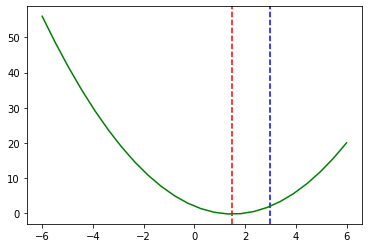

In [22]:
# Let us verify the above results  
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-6.0,6.0, num = 24 )
y = f(x)
x1 = 1.5
x2 = 3.0
plt.axvline(x = x1, color = 'r', linestyle = "--")
plt.axvline(x = x2, color = 'b', linestyle = "--")
plt.plot(x,y,color = 'g')
plt.show()
# As is evident, with no bounded region, the function has its minimum value at 1.5 and with a bounded region (3,5), the minimum value is at 3 since function is monotonic in that range 

In [1]:
# Problems in Microeconomics 
## The aim here is to make the work interactive. 
### Once someone runs this code chunk, she/he would be asked to mention prices of x, y and income 
#### Given the prices and income, the optimum bundles would be calculated and printed as output
# Let's solve a few basic problems related to utility maximization concept
from scipy.optimize import minimize #since we cannot have the option'maximize', we have to minimize and define the function accordingly
import numpy as np
def U(x):
    return -1.0*(x[0]**0.5)*(x[1]**0.5) #Cobb Douglas Utility Function
price1 = float(input('Price of x?\n'))
price2 = float(input('Price of y?\n'))
income = float(input('Income of consumer?\n'))
p1 = int(price1) # assuming price of good 1 to be equal to 2
p2 = int(price2) # assuming price of good 2 to be equal to 5
m = int(income)
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([p1,p2],0,m)  
from scipy.optimize import Bounds 
bounds = Bounds([0,0],[m,m]) # One cannot consume more than m units of either consumer good and also not negative amounts
x0 = np.array([2,2])
result = minimize(U,x0,method = 'trust-constr', constraints = [linear_constraint], bounds = bounds)
print(result.x)

Price of x?
2
Price of y?
5
Income of consumer?
500
[124.99993677  49.99998483]


In [2]:
# Intertemporal Optimization Problem (2 period model) 
## We make the problem interactive again 
### One has to mention the discount factor, rate of interest, incomes in two time periods
#### Given the values, optimum consumption for the two time periods would be calculated 
# Consumption in second period is discounted by a discount factor and savings of first period is used in second period
import numpy as np 
from scipy.optimize import minimize 
discount_factor = float(input('Discount factor?\n'))
a = int(discount_factor) 
def U(x):
    return -1.0*(np.log(x[0]) + np.log(x[1])/(1 + a))
r_o_i = float(input('Rate of interest?\n'))
income1 = float(input('Income in period 1?\n'))
income2 = float(input('Income in period 2?\n'))
r = int(r_o_i)  
m1 = int(income1)
m2 = int(income2)
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([1,1/(1+r)],0,m1 + m2/(1+r))
from scipy.optimize import Bounds
bounds = Bounds([0,0],[m1,m1 + m2])
x0 = np.array([10,10])
result = minimize(U,x0,method = 'trust-constr', constraints = [linear_constraint],bounds = bounds) 
print(result.x)

Discount factor?
0.1
Rate of interest?
0.06
Income in period 1?
100
Income in period 2?
200
[ 99.99902544 199.999314  ]
